# The Skewed Kurtosis

## 1. Exploratory Data Analysis

EDA is part of another file uploaded separately.

## 2. Outliers Analysis

Remove outliers before missing data imputations as it might affect the impuations.

In [2316]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [2317]:
htrain = train.copy()
htest = test.copy()

In [2318]:
#get total square footage of house
htrain['TotalSF'] = htrain['TotalBsmtSF'] + htrain['1stFlrSF'] + htrain['2ndFlrSF']

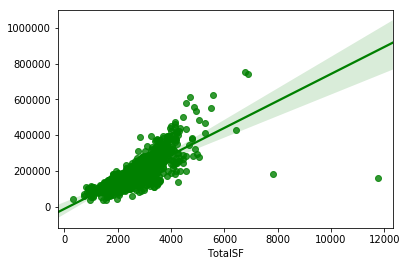

In [2319]:
#look at TotalSquareFt against Price
y_train2 = htrain.SalePrice.values
figsize=(22,60)
sns.regplot(x = htrain.TotalSF, y = y_train2, color='green' )

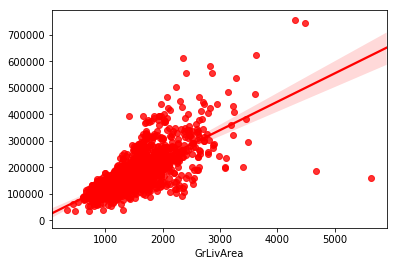

In [2320]:
#look at GrLivArea against Price
sns.regplot(x = htrain['GrLivArea'], y = y_train2, color = 'red')

In [2321]:
#Deleting outliers in both above variables
htrain=htrain[htrain['TotalSF']<7800] 
htrain = htrain[htrain['GrLivArea']<4500]
htrain.drop("TotalSF", axis = 1, inplace = True)
htrain.shape

(1458, 81)

## 3. Missing Value Analysis

In [2322]:
ntrain = htrain.shape[0]
ntest = htest.shape[0]
y_train1 = htrain.SalePrice.values
all_data = pd.concat((htrain, htest)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print('all_data size is : {}'.format(all_data.shape))
all_data.head()

all_data size is : (2917, 80)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


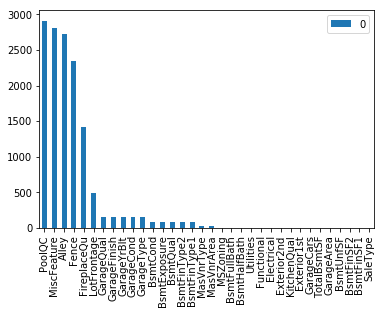

In [2323]:
#looking at missing values in data 
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0].plot(kind='bar')

In [2324]:
#substitute PoolQC where Pool area >0 with values after looking at the other values

all_data.loc[2420, 'PoolQC'] = 'Fa'
all_data.loc[2503,'PoolQC'] = 'Gd'
all_data.loc[2599,'PoolQC'] = 'Fa'

In [2325]:
#fill categorical variables that have Na as 'None' category
col_missings = ["Alley", "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1", 
"BsmtFinType2", "FireplaceQu", "GarageType","GarageFinish","GarageQual",
"GarageCond", "PoolQC", "Fence","MiscFeature"]
all_data[col_missings] = all_data[col_missings].fillna(value = "None")
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


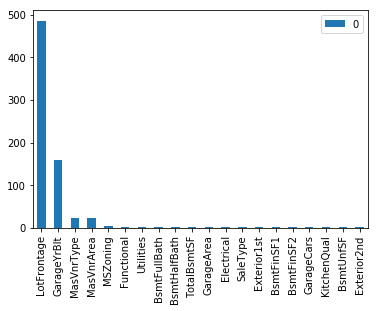

In [2326]:
#looking at missing values in data 
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0].plot(kind='bar')

In [2327]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [2328]:
##imputing KNN 
#from fancyimpute  import KNN
#all_data[['LotFrontage','MasVnrArea']] = pd.DataFrame(KNN(k=30).complete(all_data[['LotFrontage','MasVnrArea']])).as_matrix()
#imputing MasVnrType with mode of train
#all_data['MasVnrType'] = all_data['MasVnrType'].fillna(train['MasVnrType'].mode()[0])

In [2329]:
#fill in missing value for GarageYr
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)
all_data.shape

(2917, 80)

Total Missing Data: 23
Missing number of rows: 13


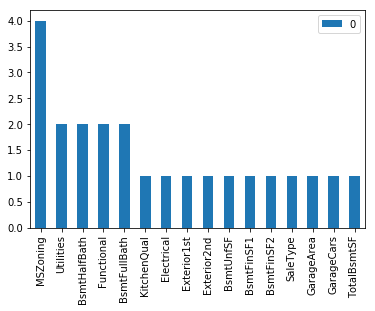

In [2330]:
#looking at missing values in data 
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
print("Total Missing Data: {}".format(sum(missing[missing[0]!=0][0])))

plot_data=all_data[pd.isnull(all_data).any(axis=1)]
print("Missing number of rows: {}".format(plot_data.shape[0]))
missing[missing[0]!=0].plot(kind='bar')


In [2337]:
#Imputing missingness with values, selected after careful study of data and data description file
all_data["Functional"].fillna('Typ', inplace=True)
all_data["GarageCars"].fillna(train["GarageCars"].mean(), inplace=True)
all_data["GarageArea"].fillna(train["GarageArea"].mean(), inplace=True)
all_data['Utilities'].fillna(train['Utilities'].mode()[0], inplace = True)
all_data['Electrical'].fillna(train['Electrical'].mode()[0], inplace = True)
all_data['KitchenQual'].fillna(train['KitchenQual'].mode()[0], inplace = True)
all_data['Exterior1st'].fillna(train['Exterior1st'].mode()[0], inplace = True)
all_data['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0], inplace = True)
all_data['SaleType'].fillna(train['SaleType'].mode()[0], inplace = True)
all_data['BsmtHalfBath'].fillna(0, inplace = True)
all_data['BsmtFullBath'].fillna(0, inplace = True)
all_data['MSZoning'] = all_data['MSZoning'].fillna(train['MSZoning'].mode()[0])

Total Missing Data: 4
Missing number of rows: 1


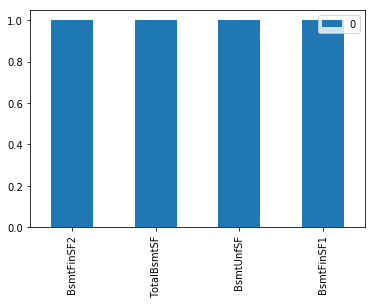

In [2338]:
#looking at missing values in data 
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
print("Total Missing Data: {}".format(sum(missing[missing[0]!=0][0])))

plot_data=all_data[pd.isnull(all_data).any(axis=1)]
print("Missing number of rows: {}".format(plot_data.shape[0]))
missing[missing[0]!=0].plot(kind='bar')

We have 4 missing values in the data but we will handle those after interactions below as missingness part 2

## 4. Category Encoding

In [2367]:
clean_data=all_data.copy()

In [2368]:
#convert categorical ordinal columns
col_ordinal = clean_data[['ExterQual', 'ExterCond', 'BsmtQual',"BsmtCond",
           "BsmtExposure", "HeatingQC",
          "KitchenQual", "FireplaceQu", "GarageType","GarageQual",
          "GarageCond","PoolQC"]]

ord_dic1 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1,'None':0}
for col in col_ordinal:
    clean_data[col] = clean_data[col].map(lambda x: ord_dic1.get(x, 0))

#fix LotShape
ord_dic2 = {'Reg': 4, 'IR1': 3, 'IR2':2, 'IR3':1}
clean_data.LotShape = clean_data.LotShape.map(lambda x: ord_dic2.get(x, 0))

#fix BsmntExposure
ord_dic3 = {"Gd":4 ,'Av':3, 'Mn':2, 'No':1, 'None':0}
clean_data.BsmtExposure = clean_data.BsmtExposure.map(lambda x: ord_dic3.get(x, 0))

#fix GarageFinish
ord_dic4 = {'Fin':3,'RFn':2,'Unf':1,'None':0}
clean_data.GarageFinish = clean_data.GarageFinish.map(lambda x: ord_dic4.get(x, 0))

#fix Paved
ord_dic5 ={'Y':3,'P':2,"N":1}
clean_data.PavedDrive = clean_data.PavedDrive.map(lambda x: ord_dic5.get(x, 0))


#fix Electrical
ord_dic6={'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1}
clean_data.Electrical = clean_data.Electrical.map(lambda x: ord_dic6.get(x, 0))

#fix BsmntFinType1
ord_dic7 = {"GLQ": 6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "None":0}
clean_data.BsmtFinType1 = clean_data.BsmtFinType1.map(lambda x: ord_dic7.get(x, 0))

#fix Fence
ord_dic8={'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'None':0}
clean_data.Fence = clean_data.Fence.map(lambda x: ord_dic8.get(x, 0))

#fix Functional
ord_dic9={"Typ":8 ,"Min1":7 , "Min2": 6, "Mod": 5, "Maj1":4 , "Maj2": 3, "Sev": 2, "Sal":1 }
clean_data.Functional = clean_data.Functional.map(lambda x: ord_dic9.get(x, 0))

## 5. Interactions

In [2369]:
clean_data.loc[clean_data['GarageYrBlt']>0, 'GarageYrBlt']=clean_data['GarageYrBlt']-clean_data['YearBuilt']

In [2370]:
clean_data.loc[clean_data['YearRemodAdd']>0, 'YearRemodAdd']=clean_data['YearRemodAdd']-clean_data['YearBuilt']

In [2371]:
#col_num = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt","LowQualFinSF"]
#for col in col_num:
#       clean_data[col]=clean_data[col].astype(str)

In [2372]:
numeric_feats = clean_data.dtypes[clean_data.dtypes != "object"].index

# Check the skew of all numerical features
col_skewed= clean_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :col_skewed})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
PoolQC,17.538430
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.143683
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [2373]:
#skewness = skewness[abs(skewness) > 0.75]
#print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

#from scipy.special import boxcox1p
#skewed_features = skewness.index
#lam = 0.15
#for feat in skewed_features:
#    clean_data[feat] = boxcox1p(clean_data[feat], lam)

In [2374]:
#col_num = clean_data.select_dtypes(exclude=["object"])
#skewness = col_num.apply(lambda x: skew(x))
#skewness_features = skewness[abs(skewness) >= 1].index
#clean_data[skewness_features] = np.log1p(clean_data[skewness_features])

In [2375]:
clean_data = pd.get_dummies(clean_data, drop_first = True)
clean_data.shape

(2917, 200)

In [2376]:
#add all Basement's SF to get new SF and match with existing  TotalBsmtSF

x=[]
clean_data['TotalBsmtSF_new'] = clean_data['BsmtFinSF1'] + clean_data['BsmtFinSF2'] + clean_data['BsmtUnfSF']
x=(clean_data['TotalBsmtSF_new'] != clean_data['TotalBsmtSF'])

x[x==True]

2118    True
dtype: bool

In [2377]:
#as only one differs that too in test, we delete the redundant basement columns and new column
clean_data.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF_new'], axis=1, inplace=True)

#get total square footage of house
clean_data['TotalSF'] = all_data['TotalBsmtSF'] + clean_data['1stFlrSF'] + clean_data['2ndFlrSF']
clean_data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis=1, inplace=True)
clean_data.head()

,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFullBath,BsmtHalfBath,BsmtQual,Electrical,EnclosedPorch,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa,TotalSF
0,0,3,3,0,6,1.0,0.0,4,5,0,...,0,0,0,0,0,0,1,1,0,2566.0
1,0,3,3,0,5,0.0,1.0,4,5,0,...,0,0,0,0,0,0,1,1,0,2524.0
2,0,3,3,0,6,1.0,0.0,4,5,0,...,0,0,0,0,0,0,1,1,0,2706.0
3,0,3,4,0,5,1.0,0.0,3,5,272,...,0,0,0,0,0,0,1,1,0,2473.0
4,0,4,3,0,6,1.0,0.0,4,5,0,...,0,0,0,0,0,0,1,1,0,3343.0


Total Missing Data: 1
Missing number of rows: 1


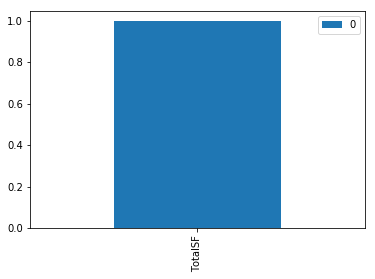

In [2378]:
#looking at missing values in data 
missing = pd.DataFrame(clean_data.isnull().sum().sort_values(ascending=False))
print("Total Missing Data: {}".format(sum(missing[missing[0]!=0][0])))

plot_data=clean_data[pd.isnull(clean_data).any(axis=1)]
print("Missing number of rows: {}".format(plot_data.shape[0]))
missing[missing[0]!=0].plot(kind='bar')

## 6. Missingness part 2

In [2379]:
#imputing KNN 
from fancyimpute  import KNN
clean_data[['TotalSF']] = pd.DataFrame(KNN(k=30).complete(clean_data[['TotalSF']])).as_matrix()

Imputing row 1/2917 with 0 missing, elapsed time: 1.339
Imputing row 101/2917 with 0 missing, elapsed time: 1.339
Imputing row 201/2917 with 0 missing, elapsed time: 1.340
Imputing row 301/2917 with 0 missing, elapsed time: 1.340
Imputing row 401/2917 with 0 missing, elapsed time: 1.341
Imputing row 501/2917 with 0 missing, elapsed time: 1.341
Imputing row 601/2917 with 0 missing, elapsed time: 1.341
Imputing row 701/2917 with 0 missing, elapsed time: 1.342
Imputing row 801/2917 with 0 missing, elapsed time: 1.342
Imputing row 901/2917 with 0 missing, elapsed time: 1.342
Imputing row 1001/2917 with 0 missing, elapsed time: 1.343
Imputing row 1101/2917 with 0 missing, elapsed time: 1.343
Imputing row 1201/2917 with 0 missing, elapsed time: 1.343
Imputing row 1301/2917 with 0 missing, elapsed time: 1.343
Imputing row 1401/2917 with 0 missing, elapsed time: 1.344
Imputing row 1501/2917 with 0 missing, elapsed time: 1.344
Imputing row 1601/2917 with 0 missing, elapsed time: 1.345
Imputing 

In [2381]:
#looking at missing values in data 
missing = pd.DataFrame(clean_data.isnull().sum().sort_values(ascending=False))
print("Total Missing Data: {}".format(sum(missing[missing[0]!=0][0])))


Total Missing Data: 0


In [2382]:
clean_data.loc[clean_data['GarageYrBlt']==2207,'GarageYrBlt']=2007

In [2384]:
clean_data = clean_data.drop(["Street_Pave","Utilities_NoSeWa", "RoofMatl_Membran","RoofMatl_Metal","RoofMatl_Roll","RoofMatl_Tar&Grv","RoofMatl_WdShake","RoofMatl_WdShngl", "PoolQC", "MiscVal"],axis=1)

In [2385]:
new_train = clean_data[:ntrain].copy()
new_test = clean_data[ntrain:].copy()

## 7. Models

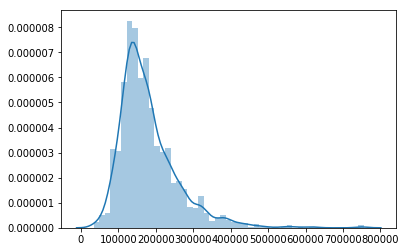

In [2386]:
sns.distplot(y_train1);
#histogram of sale prices shows that we need to normalize SalePricd

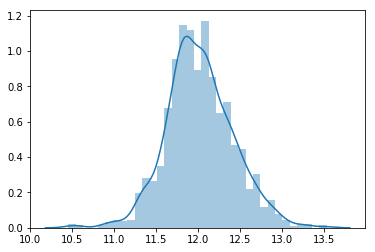

In [2387]:
Y_train=np.log1p(y_train1)
sns.distplot(Y_train)


In [2388]:
new_train.drop('Id',axis=1,inplace=True)

In [2389]:
#Linear Models
from sklearn.linear_model import Lasso, ElasticNet


#Kernel Ridge Regression
from sklearn.kernel_ridge import KernelRidge


#Gradient Boosting Machines
from sklearn.ensemble import GradientBoostingRegressor

#Random Forest
from sklearn.ensemble import RandomForestRegressor

#Support Vector Machines
from sklearn import svm

#Linear Regression
from sklearn import linear_model

#Make Pipeline
from sklearn.pipeline import make_pipeline

#Robust Scaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(
                                    new_train, Y_train, random_state=42, test_size=.33)


### 7.1 Multi Linear Regression 

In [2390]:

lr = linear_model.LinearRegression()

In [2391]:
model_lr = lr.fit(X_train, y_train)

In [2392]:
print("R^2 for train set: %f" %model_lr.score(X_train, y_train))


R^2 for train set: 0.947506


In [2393]:
predictions = model_lr.predict(X_test)

In [2394]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE is: 
 0.128089612711


### 7.2.  Regression with Regularization

In [2411]:
# The error metric: RMSE on the log of the sale prices.
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [2412]:
#manual cross validation function
def my_cross_validate(alphas, Model):
    min_rmse = float('inf')
    best_alpha = None
    for alpha in alphas:
        model = Model(alpha, max_iter=50000).fit(X_train, y_train)
        model_rmse = rmse(model.predict(X_test), y_test)
        if model_rmse < min_rmse:
            best_alpha = alpha
            min_rmse = model_rmse

    print('best_alpha = ', best_alpha, 'min_rmse = ', min_rmse)

alphas = np.logspace(-3,1e2,100)


## 7.2.1 Lasso

### A. Lasso with cross validation function 

In [2413]:
my_cross_validate(alphas, Lasso)

best_alpha =  0.001 min_rmse =  0.117119757195


### B. Lasso with KFold and Cross_Val_Score (manual nested cross validation)

In [2414]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=1).get_n_splits(new_train.values)
    rmse= np.sqrt(-cross_val_score(model, new_train.values, Y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [2415]:
alphas = np.logspace(-3,100,100)
best_alpha = None
min_rmse = float('inf')
for alpha in alphas:
    lasso = Lasso(alpha =alpha, random_state=1, max_iter=50000)
    score = rmsle_cv(lasso)
    score_min = score.mean()
    if min_rmse > score_min :
        min_rmse = score_min
        #std = score.std()
        best_alpha = alpha

print('best_alpha = ', best_alpha, 'min_rmse = ', min_rmse)

best_alpha =  0.001 min_rmse =  0.115440797174


### C. Lasso with Grid Search

In [2404]:

grid_para_ls = [
    {
        'alpha': np.logspace(-3,100,100)
    }
]

las = Lasso()
grid_search_ls = GridSearchCV(las, grid_para_ls, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
grid_search_ls.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'alpha': array([  1.00000e-003,   1.09750e-002, ...,   9.11163e+098,   1.00000e+100])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [2405]:
grid_search_ls.best_params_

{'alpha': 0.001}

### D. Final Lasso with alpha = 0.001

In [2417]:
lasso=make_pipeline(RobustScaler(),Lasso(alpha = 0.001, random_state=1))

In [2418]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1153 (0.0123)



## 7.2.2 ElasticNet

### A. ElasticNet with cross validation function

In [2419]:
my_cross_validate(alphas, ElasticNet)

best_alpha =  0.001 min_rmse =  0.117536044194


### B. ElecticNet with KFold and Cross_Val_Score (manual nested cross validation)

In [2420]:
#ElasticNet
alphas = np.logspace(-3,100,100)
best_alpha = None
min_rmse = float('inf')
for alpha in alphas:
    ENet = ElasticNet(alpha = alpha, random_state=1, max_iter=50000)
    score = rmsle_cv(ENet)
    score_min = score.mean()
    if min_rmse > score_min :
        min_rmse = score_min
        #std = score.std()
        best_alpha = alpha

print('best_alpha = ', best_alpha, 'min_rmse = ', min_rmse)

best_alpha =  0.001 min_rmse =  0.114439703391


### C. ElasticNet with Grid Search

In [ ]:
grid_para_enet = [
    {
        'alpha': np.logspace(-3,1,150),
        'l1_ratio' : np.arange(0,1,0.01)
    }
]

enet = ElasticNet(max_iter=50000)
grid_search_enet = GridSearchCV(enet, grid_para_enet, scoring = 'neg_mean_squared_error', cv = 3, n_jobs = -1)
grid_search_enet.fit(X_train, y_train)

In [764]:
grid_search_enet.best_params_

{'alpha': 0.0093260334688321997, 'l1_ratio': 0.01}

In [2439]:
ENet = make_pipeline(RobustScaler(),ElasticNet( alpha=0.00932, l1_ratio=.01, random_state=3))


In [2440]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1138 (0.0126)



### 7.2.3. Submission

In [2441]:
#create the submission file
submission_enet = pd.DataFrame()
submission_enet['Id'] = new_test.Id
submission_lasso = pd.DataFrame()
submission_lasso['Id'] = new_test.Id
new_test.drop('Id',axis=1,inplace=True)

In [2442]:
ENet.fit(new_train, Y_train)
lasso.fit(new_train, Y_train)
predict_enet=ENet.predict(new_test)
predict_lasso=ENet.predict(new_test)

In [2443]:
final_predict_enet = np.exp(predict_enet)
final_predict_lasso = np.exp(predict_enet)
print ("Original predictions are: \n", predict_enet[:5], "\n")
print ("Final predictions are: \n", final_predict_enet[:5])
submission_enet['SalePrice'] = final_predict_enet
submission_lasso['SalePrice'] = final_predict_lasso

Original predictions are: 
 [ 11.63389443  11.9492519   12.06378147  12.18771868  12.18833474] 

Final predictions are: 
 [ 112858.98864421  154701.37061914  173473.73291452  196362.68825367
  196483.69673658]


In [2444]:
submission_enet.to_csv("SheetalSubmission_enet.csv", index=False)
submission_lasso.to_csv("SheetalSubmission_lasso.csv", index=False)

### 7.3 Gradient Boosting Regression

### A. Untuned GBM

In [2447]:
# Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.005,
                               max_depth=20, max_features='sqrt',
                               min_samples_leaf=15, min_samples_split=10, 
                               loss='huber', random_state =5)

score = rmsle_cv(GBoost)
print('[model] ', "Gradient Boosting score(cv): {:.4f} ({:.4f})".format(score.mean(), score.std()))

[model]  Gradient Boosting score(cv): 0.1170 (0.0154)


### B. GBM Grid Search

In [ ]:
grid_para_gbm = [
    {
        'n_estimators': np.arange(1,3000,500),
        'max_depth': [5, 10, 15, 20],
        'min_samples_split' : [10, 15, 20, 30, 40, 50]      
    }
]

gbm = GradientBoostingRegressor()
grid_search_gbm = GridSearchCV(gbm, grid_para_gbm, scoring = 'neg_mean_squared_error', cv = 3, n_jobs = -1)
grid_search_gbm.fit(X_train, y_train)

### C. GBM with best parameters

In [ ]:

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.005,
                               max_depth=20, max_features='sqrt',
                               min_samples_leaf=15, min_samples_split=10, 
                               loss='huber', random_state =5)

score = rmsle_cv(GBoost)
print('[model] ', "Gradient Boosting score(cv): {:.4f} ({:.4f})".format(score.mean(), score.std()))

### 7.4 Random Forest

### A. Untuned Parameters

In [ ]:
# aggressive random forst model
rfr = RandomForestRegressor(random_state=0, 
    n_estimators=1000, max_depth=9,  max_features='auto')
score = rmsle_cv(rfr)
print('[model] ', "Random Forest: {:.4f} ({:.4f})".format(score.mean(), score.std()))

### 8. Plots

In [ ]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [ ]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

### Below things to be cosidered just for future use

In [ ]:
#ntrain = htrain.shape[0]
#ntest = htest.shape[0]
#y_train = htrain.SalePrice.values
new_train = all_dummy[:ntrain]
new_test = all_dummy[:ntest]
y_train =pd.DataFrame(y_train)
y_train.columns = ["SalePrice"]

new_train = new_train.merge(y_train, how = "inner", right_index = True, left_index = True)


In [ ]:
from scipy import stats
#examinig outliers by computing abs value of zscore and more than 4 sd from mean w/ TotalSq
z_score = np.abs(stats.zscore(new_train[["totalsq", "SalePrice"]]))
outliers = total_price[z_score >  4]
outliers = outliers.drop_duplicates()
plt.scatter(x=outliers.totalsq, y = outliers.SalePrice)
plt.show()
print(len(outliers))
#there are outliers and they are from homes above 4000 sq ft and below 2000 sqft.?

In [ ]:
#dataset with the outliers removed
out_train = new_train[(z_score < 4).all(axis=1)]
out_train = out_train.drop_duplicates()
out_train.shape